In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
with open("out_ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8.json") as json_file:
    data = json.load(json_file)
with open("out_TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8.json") as json_file:
    data.update(json.load(json_file))

print(data)

{u'hist_ttHTobb_nMuons': {u'contents_w2': [60.672096252441406, 79.82658386230469, 0.0], u'edges': [0.0, 1.0, 2.0, 3.0], u'contents': [335.9919128417969, 446.9531555175781, 0.0]}, u'hist_ttlf_DNN': {u'contents_w2': [30493980.0, 19662382.0, 9950760.0, 6705059.0, 4603731.5, 2482537.25, 1821277.75, 1636067.25, 1004569.625, 268053.15625], u'edges': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0], u'contents': [165161.03125, 108005.1171875, 54779.84375, 33873.80078125, 20198.31640625, 13434.0341796875, 10393.4931640625, 8936.4345703125, 5255.81884765625, 1455.6524658203125]}, u'hist_tt2b_nElectrons': {u'contents_w2': [411744.34375, 466187.4375, 0.0], u'edges': [0.0, 1.0, 2.0, 3.0], u'contents': [2297.748291015625, 2613.97314453125, 0.0]}, u'hist_ttlf_nMuons': {u'contents_w2': [35479652.0, 43148812.0, 0.0], u'edges': [0.0, 1.0, 2.0, 3.0], u'contents': [188706.9375, 232786.171875, 0.0]}, u'hist_tt2b_DNN': {u'contents_w2': [64163.7578125, 70

In [3]:
var_names = {
    "nbtags": "Number of b tagged jets",
    "njets" : "Number of jets",
    "leading_jet_pt" : "leading jet pt [GeV]",
    "leading_lepton_pt" : "leading lepton pt [GeV]",
    "genWeights" : "genWeights",
    "nElectrons" : "number of electrons",
    "nMuons" : "number of muons",
    "DNN": "DNN (binary classifier)"
}

processes = ["ttHTobb", "ttbb", "tt2b","ttlf","ttb", "ttcc"]
#processes = ["ttHTobb"]

process_names = {
    "ttHTobb" : "tt+H(bb)",
    "ttbb" : "tt+bb",
    "tt2b" : "tt+2b",
    "ttb" : "tt+b",
    "ttcc" : "tt+c",
    "ttlf" : "tt+light",
    
}

colors = {
    "ttlf": (251, 102, 102),
    "ttcc": (204, 2, -0),
    "ttb": (153, 51, 51),
    "ttbb": (102, 0, 0),
    "tt2b": (80, 0, 0),
    "ttHTobb": (44, 62, 167),
}

for cn, c in colors.items():
    colors[cn] = (c[0]/255.0, c[1]/255.0, c[2]/255.0)


In [4]:
def histogram_dataset(var, data, name, bottom, process):
    
    bins = data[var]["edges"][:-1]
    counts = data[var]["contents"]
    yerr = data[var]["contents_w2"]
    
    integral = sum(counts)
    width = bins[1] - bins[0]
    
    if ("njets" in var) or ("nbtags" in var) or ("nMuons" in var) or ("nElectrons" in var):
        alignement = "center"
        w = "mid"
    else:
        alignement = "edge"
        w = "pre"
    hist = plt.bar(bins, counts, width=width, bottom=bottom, align=alignement, label=name + " ({0})".format(round(integral, 2)), color=colors[process])
    #hist = plt.bar(bins, counts, yerr=yerr, width=width, align="center", label=dataset + " ({0})".format(round(integral, 2)))
    
    if process == "ttHTobb":
        bins = data[var]["edges"][1:]
        hist = plt.step(bins, [c*1000 for c in counts], label="ttH x 50", color=colors[process], where=w)
        
    return plt.bar, counts

In [5]:
def plot_histogram(var, processes, data):
    
    bottom = None
    
    for p in processes:
        _, counts = histogram_dataset("hist_" + p + "_" + var, data, process_names[p], bottom, p)
        if processes.index(p) == 0:
            bottom = [0.0 for c in counts]
        bottom = [sum(x) for x in zip(bottom, counts)]
        
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    if var == "njets" or var == "nbtags":
        plt.yscale('log')
    plt.xlabel(var_names[var])
    plt.grid(True)
    plt.show()

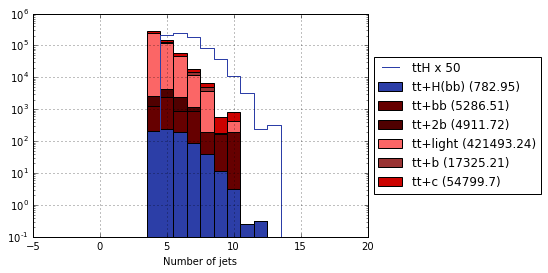

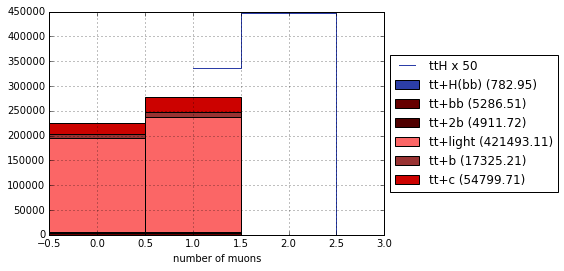

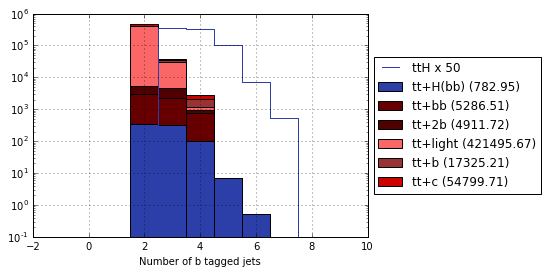

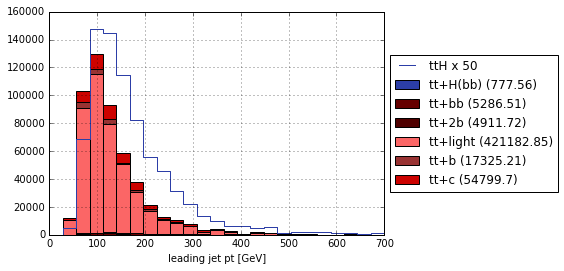

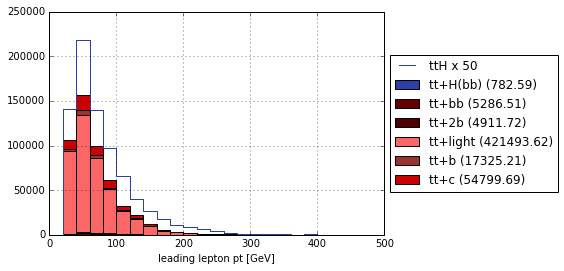

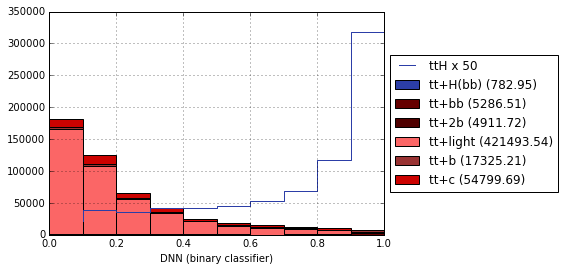

In [6]:
plot_histogram("njets", processes, data)
plot_histogram("nMuons", processes, data)
plot_histogram("nbtags", processes, data)
plot_histogram("leading_jet_pt", processes, data)
plot_histogram("leading_lepton_pt", processes, data)
plot_histogram("DNN", processes, data)